In [2]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET   

In [3]:
def function(xmlFilePath,ImgPath=None):
    tree = ET.parse(xmlFilePath)
    a=tree.getroot()
    name=list()
    
     
    for child in a:
        if child.tag=="object":                     #Extracting  character and its (xmin,ymin,xmax,ymax) 
            for i in child:
                l=list()
                k=dict()
                if(i.tag=='name'):
                    t=i.text
                if i.tag=="bndbox":
                    for j in i:
                        l.append(int(j.text))
                    k[t]=l
                    name.append(k)
                    
                    
    #converting name List into DataFrame  where char value is index and (xmin,ymin,xmax,ymax) are columns                  
    df=pd.DataFrame(columns=['xmin','ymin','xmax','ymax'],index=[list(i.keys())[0] for i in name])
    
    for i in range(len(name)):
        l=list(name[i].values())[0]
        df.iloc[i,0]=l[0]
        df.iloc[i,1]=l[1]
        df.iloc[i,2]=l[2]
        df.iloc[i,3]=l[3]
        
    df['height']=df['ymax']-df['ymin']        #calculating height of the char 
    
    df.sort_values(by=['ymin'],inplace=True)  # sorting char by there ymin values
                                                 
    
    
    
    x=df.iloc[0,[1,4]]['ymin']                    # ymin value of first value 
    y=df.iloc[0,[1,4]]['height']                  #Height of first value 
    
    df1=df[abs(df['ymin']-x)<.5*y]                #Cluster 1
    df2=df[abs(df['ymin']-x)>.5*y]                #Cluster 2
    
    df1.sort_values(by=['xmin'],inplace=True)     #sorting cluster 1
    df2.sort_values(by=['xmin'],inplace=True)     #sorting cluster 2
    
    seq=list(df1.index.values)+list(df2.index.values)  # concating cluster 1 and 2
    if(ImgPath):
        z=cv2.imread(ImgPath)
        plt.imshow(z)
    print()
    print("sequence ",end="")
    print(seq)
    
                    
    
    


sequence ['J', 'H', '1', '2', 'G', '9', '5', '6', '1']


C:\Users\amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


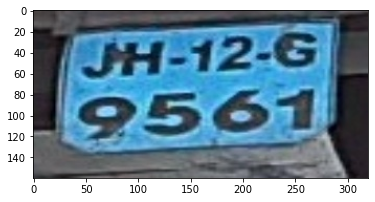

In [5]:
function('Untitled Folder/JH12G9561-3.xml','Untitled Folder/JH12G9561-3.jpg')